In [13]:
import pandas as pd
import regex as re
import ast
m = pd.read_csv("/Users/robiatualaddawiyah/Documents/College/Year_2/LPT/NLP_project/Data/dataset_ad_cd.csv")

In [44]:
m.head()

,corpus,subj_id,files,child_age,age_month,ori_speech,cleaned_speech,structure,sv_simple,imp,...,wh_q_aux_inv,prep_adv,sub_clause,SINV,emb_clause,why_q_aux_inv,sr,or_no_intv,or_intv,Other_Structure
0,Brown,A1,020318.cha,2;03.18,27,*MOT:\tno (.) he can't march .,"no, he can't march.","{'sv_modal': 1, 'fin_neg': 1}",0,0,...,0,0,0,0,0,0,0,0,0,0
1,Brown,A1,020304.cha,2;03.04,27,*MOT:\twhat are you going to pull ?,what are you going to pull?,"{'wh_q_aux_inv': 1, 'to_inf': 1}",0,0,...,1,0,0,0,0,0,0,0,0,0
2,Brown,A1,020304.cha,2;03.04,27,*MOT:\tpull Adam's bike ?,pull adam's bike?,{'imp': 1},0,1,...,0,0,0,0,0,0,0,0,0,0
3,Brown,A1,020304.cha,2;03.04,27,*MOT:\tno (.) don't take his head off .,"no, don't take his head off.",{'fin_neg': 1},0,0,...,0,0,0,0,0,0,0,0,0,0
4,Brown,A1,020304.cha,2;03.04,27,*MOT:\tleave him on there so he can drive it .,leave him on there so he can drive it.,"{'imp': 1, 'sv_modal': 1, 'emb_clause': 1, 'su...",0,1,...,0,0,1,0,1,0,0,0,0,0


In [14]:
d = m.copy()
d['st_dict'] = d['structure'].apply(ast.literal_eval)
unique_structures = set().union(*d['st_dict'].apply(lambda x: x.keys()))

In [16]:
for struct in unique_structures:
    d.loc[:, struct] = d['st_dict'].apply(lambda x: x.get(struct, 0))

In [22]:
# Create new dataframe for only those columns needed for the analysis
df = d[['subj_id', 'cleaned_speech', 'age_month',
        'sv_simple', 'imp', 'fin_neg', 'sv_modal',
        'yn_q_aux_inv', 'wh_q_aux_inv', 'prep_adv',
        'emb_clause', 'why_q_aux_inv', 'sr', 'or_no_intv', 'or_intv'
        ]]

In [46]:
d_sorted = df.sort_values(by=["subj_id", "age_month"])
d_sorted.head()

,subj_id,cleaned_speech,age_month,sv_simple,imp,fin_neg,sv_modal,yn_q_aux_inv,wh_q_aux_inv,prep_adv,emb_clause,why_q_aux_inv,sr,or_no_intv,or_intv
0,A1,"no, he can't march.",27,0,0,1,1,0,0,0,0,0,0,0,0
1,A1,what are you going to pull?,27,0,0,0,0,0,1,0,0,0,0,0,0
2,A1,pull adam's bike?,27,0,1,0,0,0,0,0,0,0,0,0,0
3,A1,"no, don't take his head off.",27,0,0,1,0,0,0,0,0,0,0,0,0
4,A1,leave him on there so he can drive it.,27,0,1,0,1,0,0,0,1,0,0,0,0


In [45]:
df_sum = d_sorted.groupby(['subj_id', 'age_month']).sum(numeric_only=True).reset_index()
df_sum.head()

,subj_id,age_month,sv_simple,imp,fin_neg,sv_modal,yn_q_aux_inv,wh_q_aux_inv,prep_adv,emb_clause,why_q_aux_inv,sr,or_no_intv,or_intv
0,A1,27,226,82,121,56,120,114,12,48,13,4,1,0
1,A1,28,287,80,112,38,123,126,9,59,12,2,0,1
2,A1,29,65,25,16,2,32,27,0,7,3,3,0,0
3,A1,30,184,63,86,40,43,55,8,63,16,1,3,0
4,A1,31,236,59,134,39,28,68,6,53,20,3,0,0


In [53]:
df_sum.columns

Index(['subj_id', 'age_month', 'sv_simple', 'imp', 'fin_neg', 'sv_modal',
       'yn_q_aux_inv', 'wh_q_aux_inv', 'prep_adv', 'emb_clause',
       'why_q_aux_inv', 'sr', 'or_no_intv', 'or_intv'],
      dtype='object')

In [56]:
df_sum['subj_id'].unique()

array(['A1', 'A2', 'A3', 'A4', 'C1', 'C2', 'C3', 'C4', 'C5'], dtype=object)

In [47]:
C1 = df_sum[df_sum['subj_id']=='C1']
C1.head()

,subj_id,age_month,sv_simple,imp,fin_neg,sv_modal,yn_q_aux_inv,wh_q_aux_inv,prep_adv,emb_clause,why_q_aux_inv,sr,or_no_intv,or_intv
138,C1,27,106,346,1,5,1,2,3,2,0,0,0,0
139,C1,28,90,329,16,1,0,1,1,2,0,1,0,0
140,C1,29,36,84,5,0,1,0,2,1,0,0,0,0
141,C1,30,142,233,4,3,1,3,2,3,0,1,0,0
142,C1,31,175,266,29,2,4,1,5,4,0,0,0,0


## Data Visualization

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

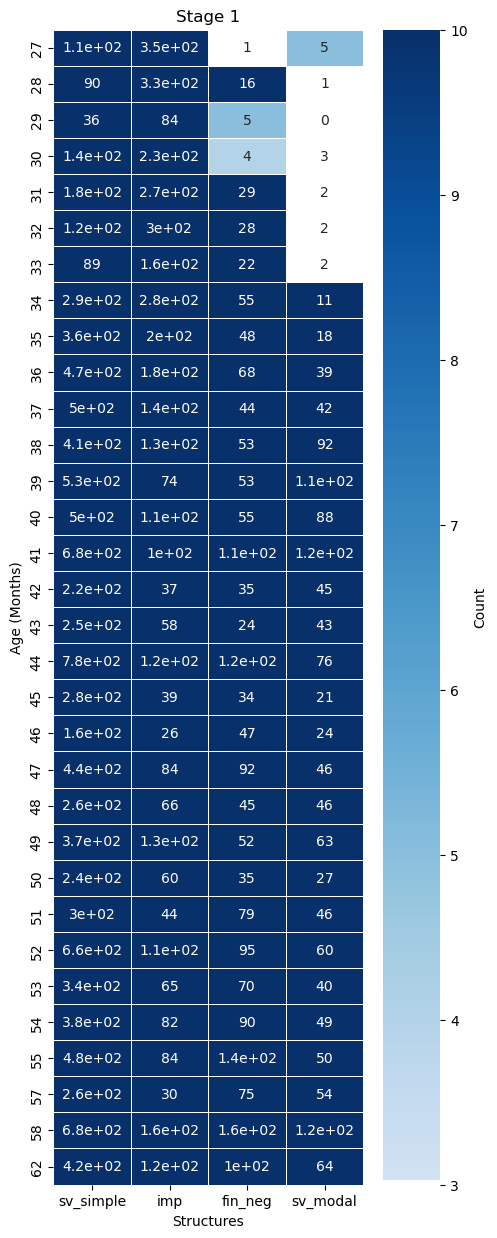

In [50]:
stage_1 = C1[['age_month', 'sv_simple', 'imp', 'fin_neg', 'sv_modal']]
stage_1.set_index('age_month', inplace=True)
structures = stage_1[['sv_simple', 'imp', 'fin_neg', 'sv_modal']]

# Create a custom colormap where 0 is white
cmap = sns.color_palette("Blues", as_cmap=True)  # Reds colormap
cmap = ListedColormap(['white'] + list(cmap(np.linspace(0.2, 1, 256))))

# Adjust vmax to ensure small values are colored noticeably
max_value = structures.to_numpy().max()
vmax_adjusted = max_value if max_value <= 10 else 10  # Limit vmax to a smaller value, e.g., 10

# Plot the heatmap
plt.figure(figsize=(5, 15))
sns.heatmap(
    structures,
    annot=True,
    cmap=cmap,
    cbar_kws={'label': 'Count'},
    linewidths=0.5,
    vmin=3,
    vmax=vmax_adjusted  # Use adjusted vmax
)

plt.title('Stage 1')
plt.xlabel('Structures')
plt.ylabel('Age (Months)')

plt.show()

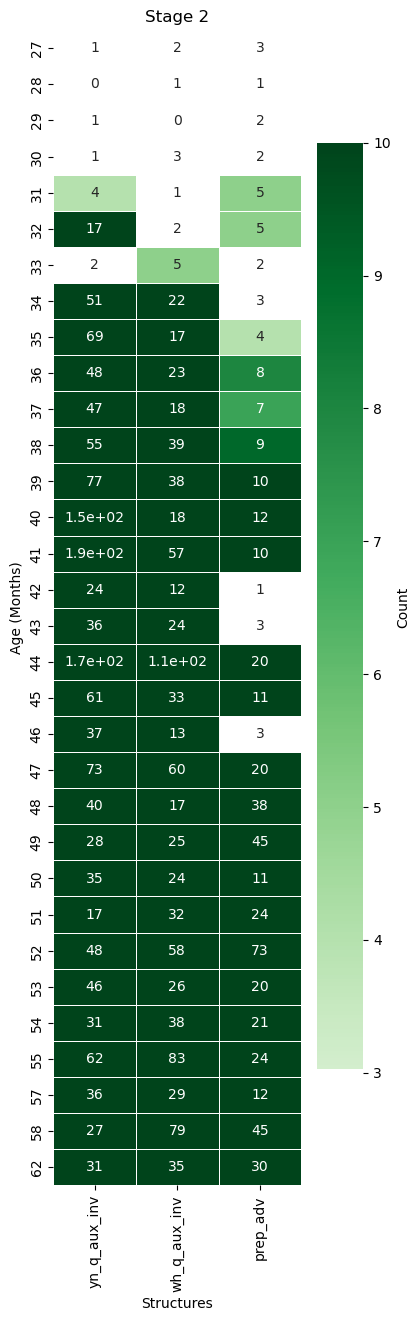

In [51]:
stage_2 = C1[['age_month', 'yn_q_aux_inv', 'wh_q_aux_inv', 'prep_adv']]
stage_2.set_index('age_month', inplace=True)
structures = stage_2[['yn_q_aux_inv', 'wh_q_aux_inv', 'prep_adv']]

# Create a custom colormap where 0 is white
cmap = sns.color_palette("Greens", as_cmap=True)  # Reds colormap
cmap = ListedColormap(['white'] + list(cmap(np.linspace(0.2, 1, 256))))

# Adjust vmax to ensure small values are colored noticeably
max_value = structures.to_numpy().max()
vmax_adjusted = max_value if max_value <= 10 else 10  # Limit vmax to a smaller value, e.g., 10

# Plot the heatmap
plt.figure(figsize=(4, 15))
sns.heatmap(
    structures,
    annot=True,
    cmap=cmap,
    cbar_kws={'label': 'Count'},
    linewidths=0.5,
    vmin=3,
    vmax=vmax_adjusted  # Use adjusted vmax
)

# Add labels and title
plt.title('Stage 2')
plt.xlabel('Structures')
plt.ylabel('Age (Months)')

# Display the heatmap
plt.show()

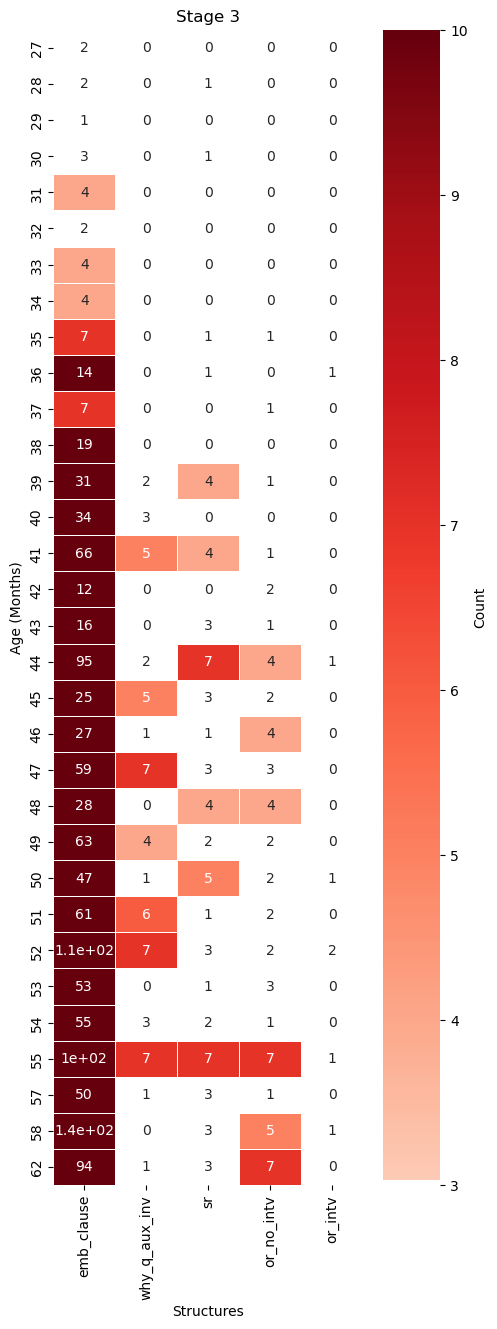

In [52]:
stage_3 = C1[['age_month', 'emb_clause', 'why_q_aux_inv', 'sr', 'or_no_intv', 'or_intv']]
stage_3.set_index('age_month', inplace=True)
structures = stage_3[['emb_clause', 'why_q_aux_inv', 'sr', 'or_no_intv', 'or_intv']]

# Create a custom colormap where 0 is white
cmap = sns.color_palette("Reds", as_cmap=True)  # Reds colormap
cmap = ListedColormap(['white'] + list(cmap(np.linspace(0.2, 1, 256))))

# Adjust vmax to ensure small values are colored noticeably
max_value = structures.to_numpy().max()
vmax_adjusted = max_value if max_value <= 10 else 10  # Limit vmax to a smaller value, e.g., 10

# Plot the heatmap
plt.figure(figsize=(5, 15))
sns.heatmap(
    structures,
    annot=True,
    cmap=cmap,
    cbar_kws={'label': 'Count'},
    linewidths=0.5,
    vmin=3,
    vmax=vmax_adjusted  # Use adjusted vmax
)

# Add labels and title
plt.title('Stage 3')
plt.xlabel('Structures')
plt.ylabel('Age (Months)')

# Display the heatmap
plt.show()

### Create a function for data visualization

In [66]:
def heatmaps(df):
    subj_ids = df['subj_id'].unique()

    stage_configs = [
        {
            'cols': ['sv_simple', 'imp', 'fin_neg', 'sv_modal'],
            'cmap': "Blues",
            'title': "Stage 1"
        },
        {
            'cols': ['yn_q_aux_inv', 'wh_q_aux_inv', 'prep_adv'],
            'cmap': "Greens",
            'title': "Stage 2"
        },
        {
            'cols': ['emb_clause', 'why_q_aux_inv', 'sr', 'or_no_intv', 'or_intv'],
            'cmap': "Reds",
            'title': "Stage 3"
        }
    ]

    for subj in subj_ids:
        subj_df = df[df['subj_id'] == subj]
        print(f"Heatmap: {subj}")
        
        for stage in stage_configs:
            stage_data = subj_df[['age_month'] + stage['cols']].copy()
            stage_data.set_index('age_month', inplace=True)
            structures = stage_data[stage['cols']]
            
            # Create a colormap with white for vmin
            base_cmap = sns.color_palette(stage['cmap'], as_cmap=True)
            cmap = ListedColormap(['white'] + list(base_cmap(np.linspace(0.2, 1, 256))))
            
            # Adjust vmax
            max_value = structures.to_numpy().max()
            vmax_adjusted = max_value if max_value <= 10 else 10

            # Plot
            plt.figure(figsize=(5, 15))
            sns.heatmap(
                structures,
                annot=True,
                cmap=cmap,
                cbar_kws={'label': 'Count'},
                linewidths=0.5,
                vmin=3,
                vmax=vmax_adjusted
            )
            plt.title(f"{stage['title']} - {subj}")
            plt.xlabel('Structures')
            plt.ylabel('Age (Months)')
            plt.tight_layout()
            plt.show()


Heatmap: A1


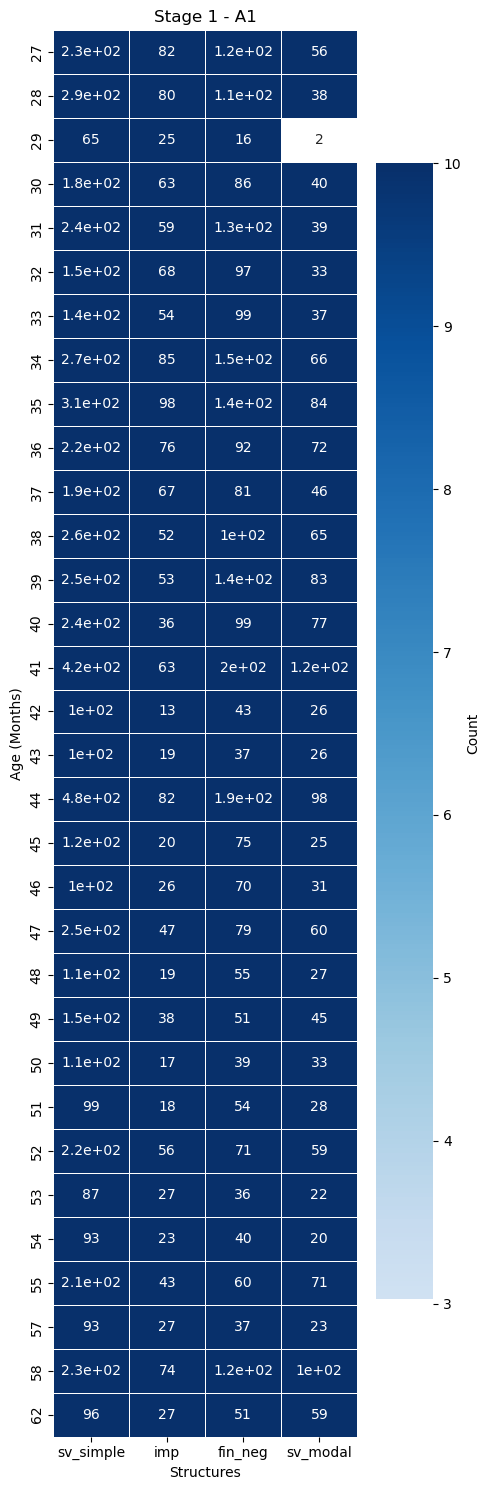

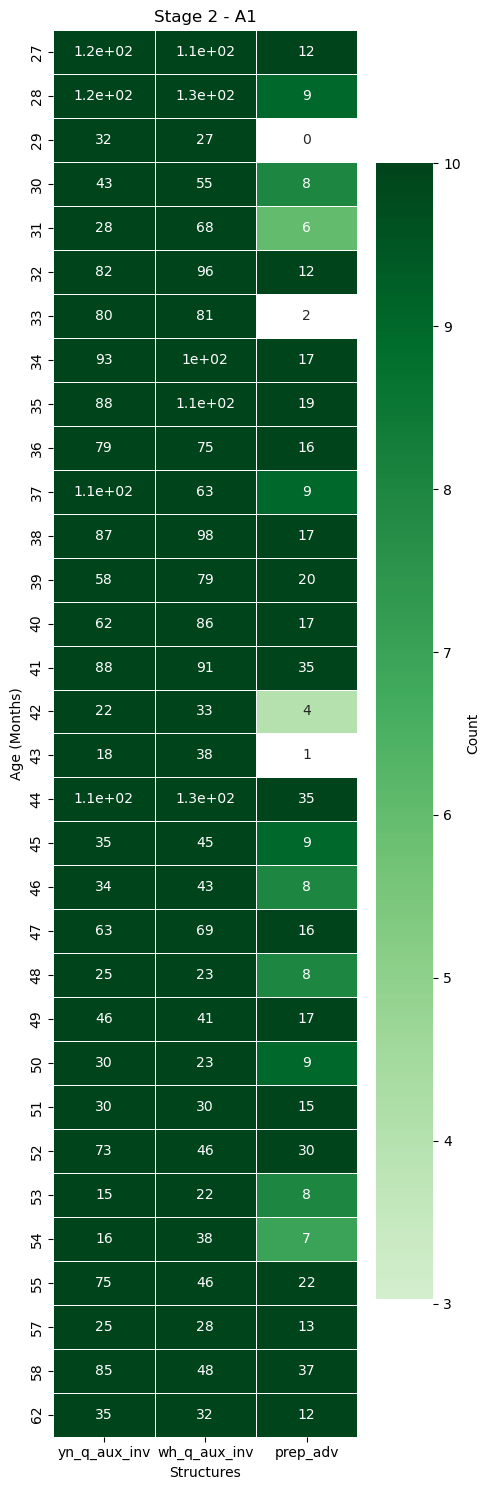

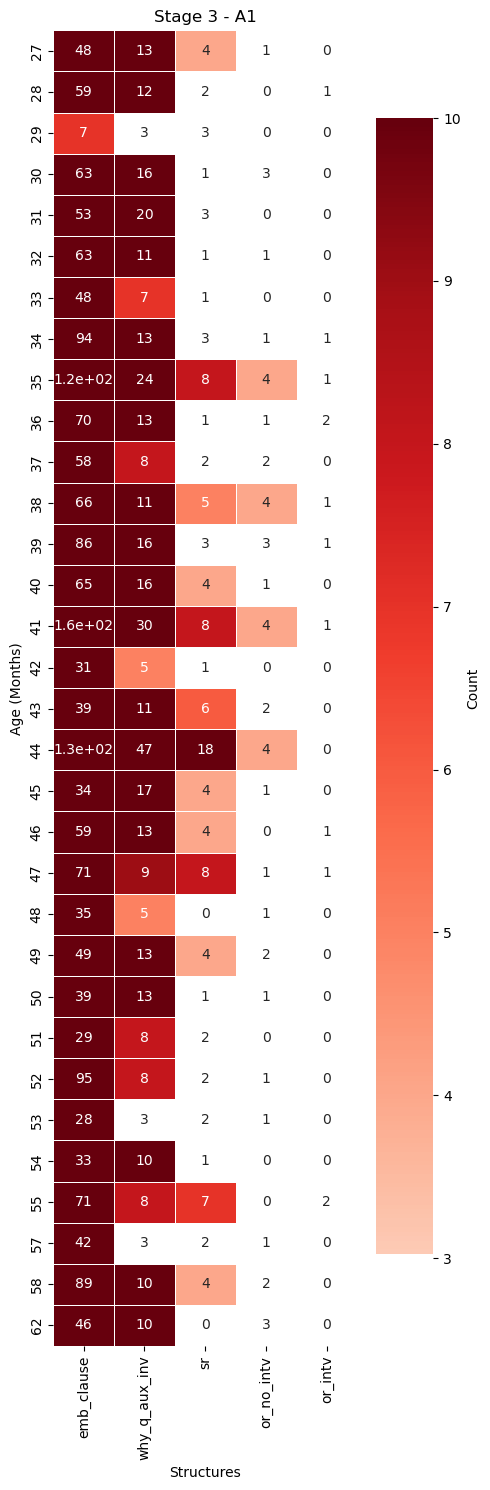

Heatmap: A2


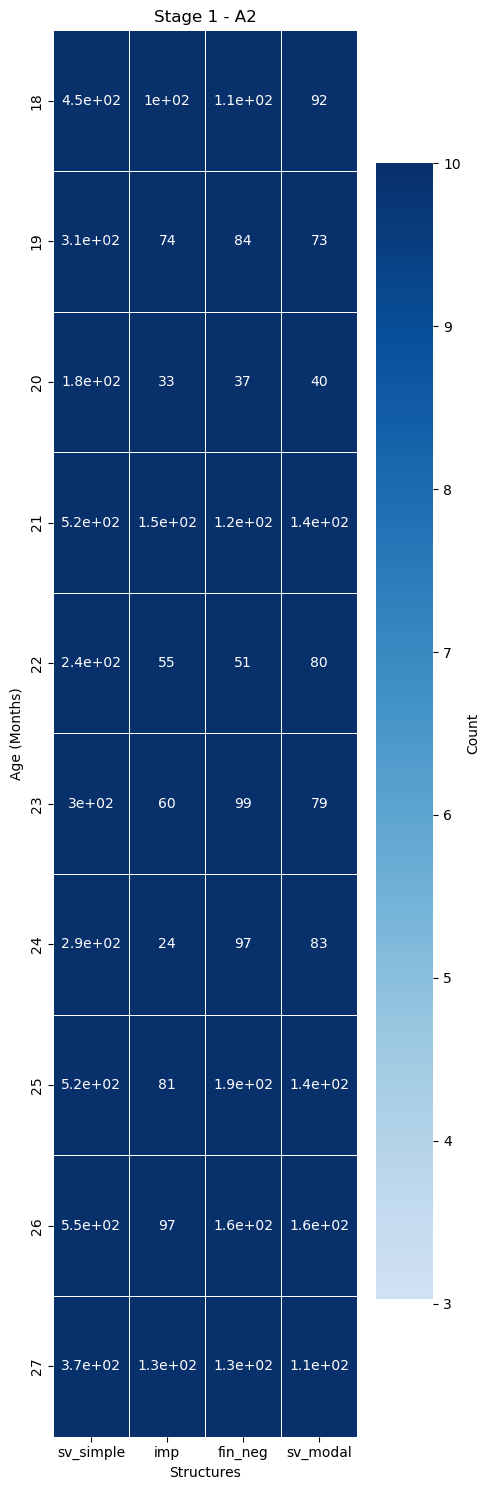

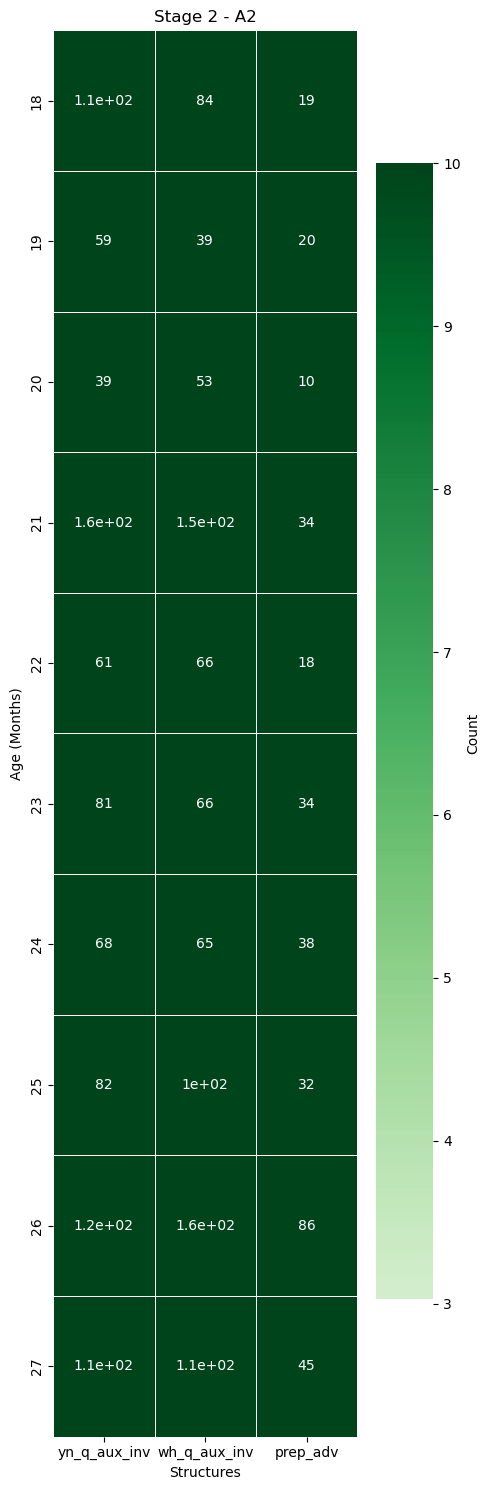

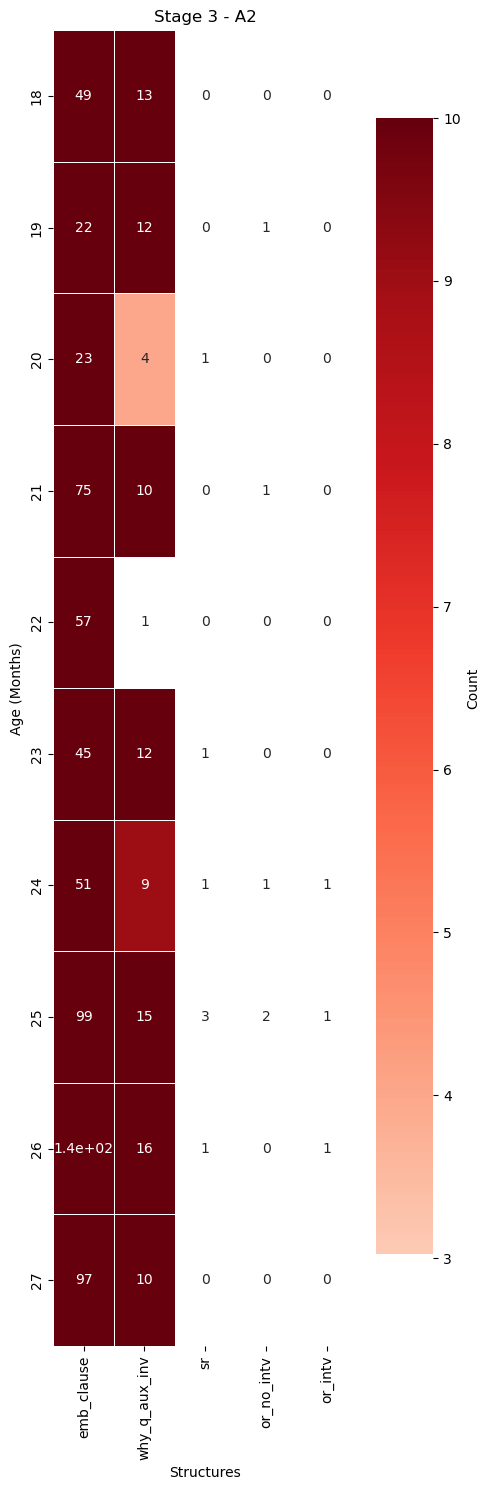

Heatmap: A3


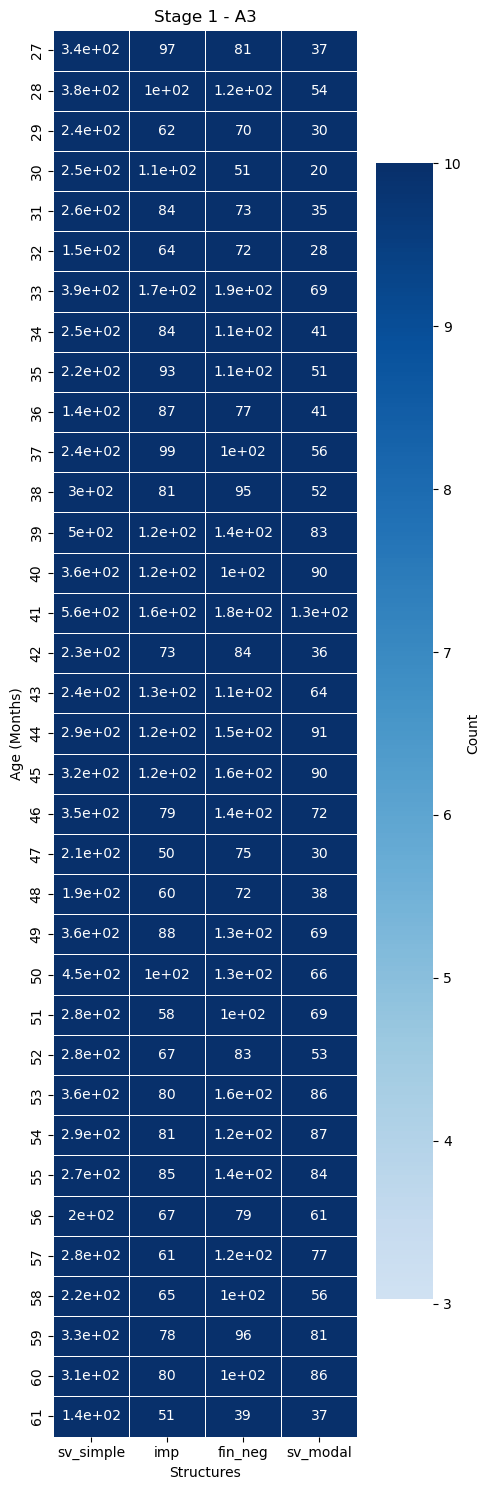

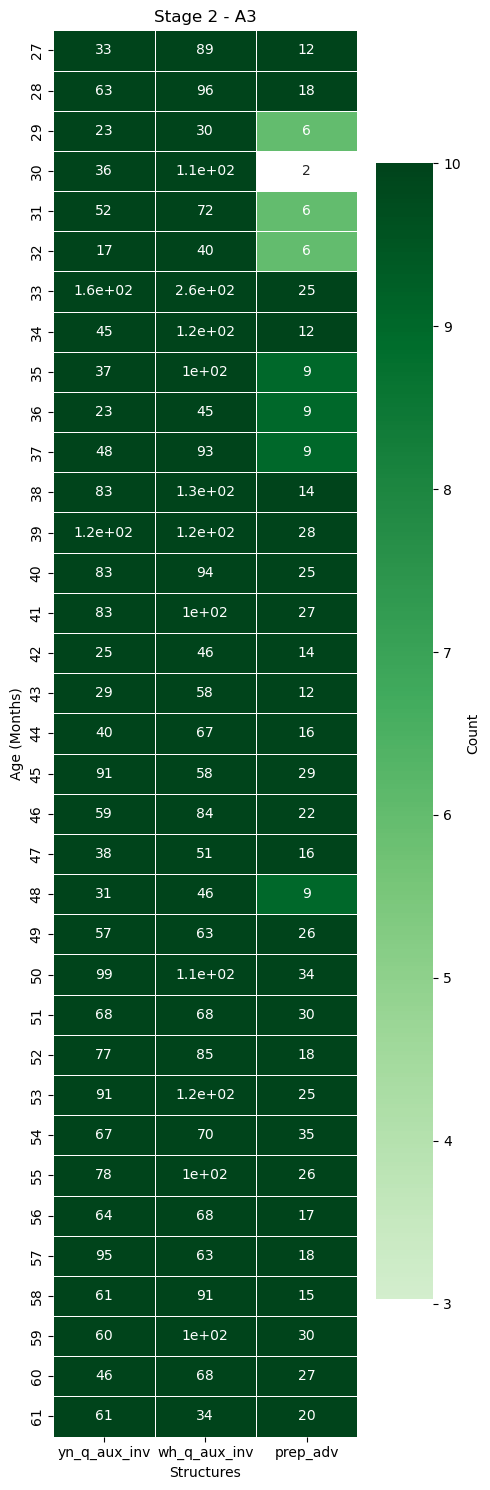

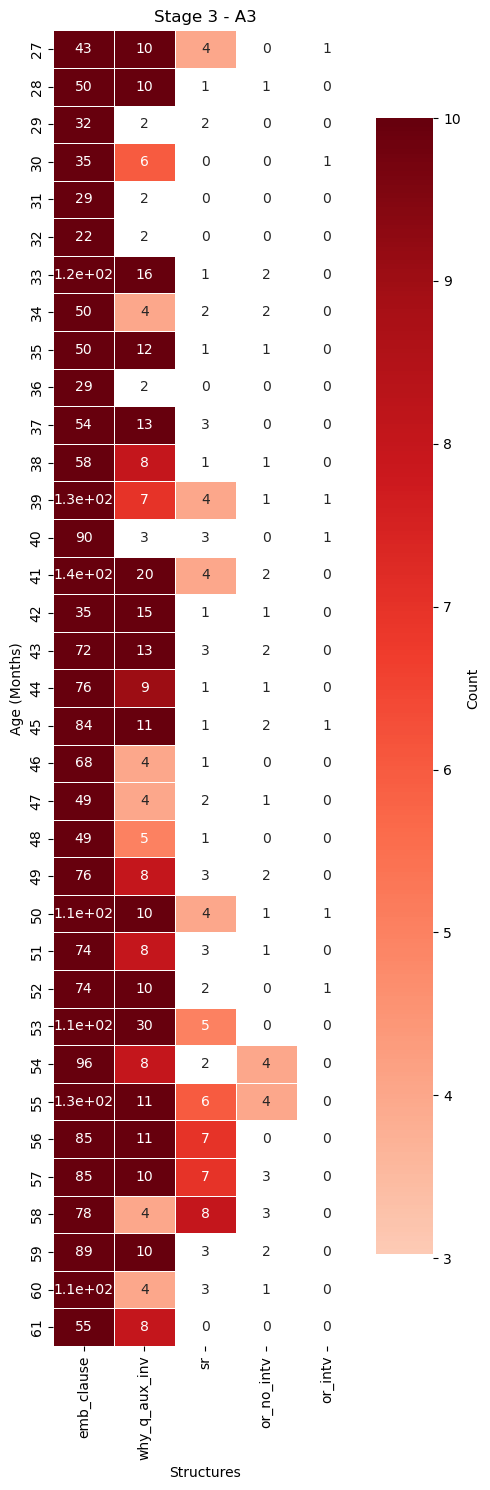

Heatmap: A4


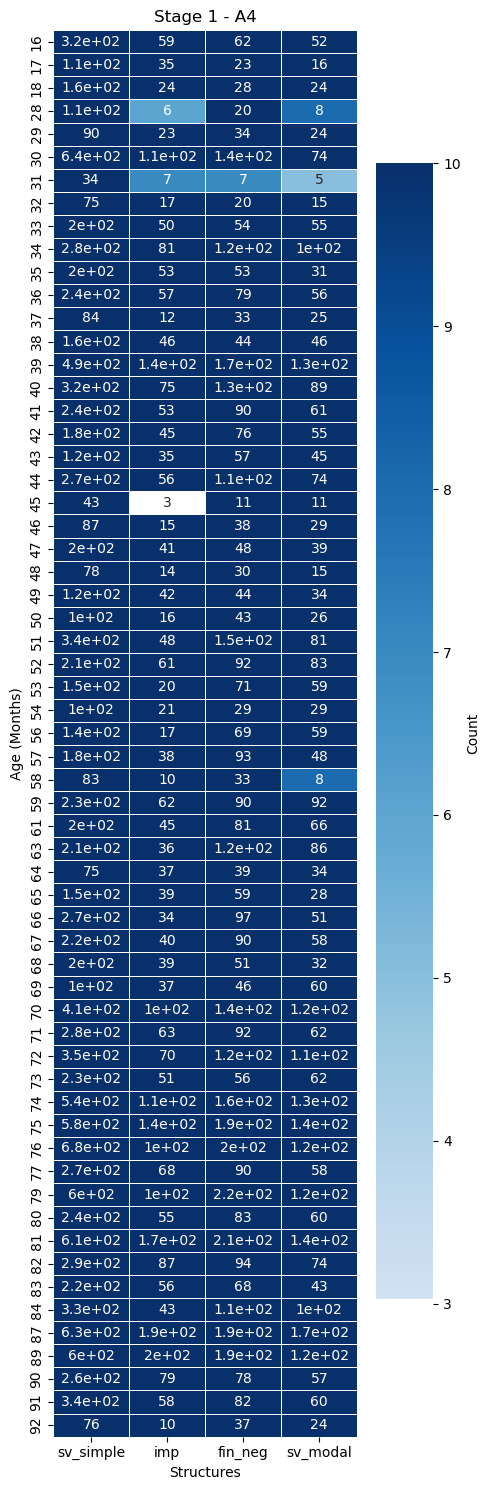

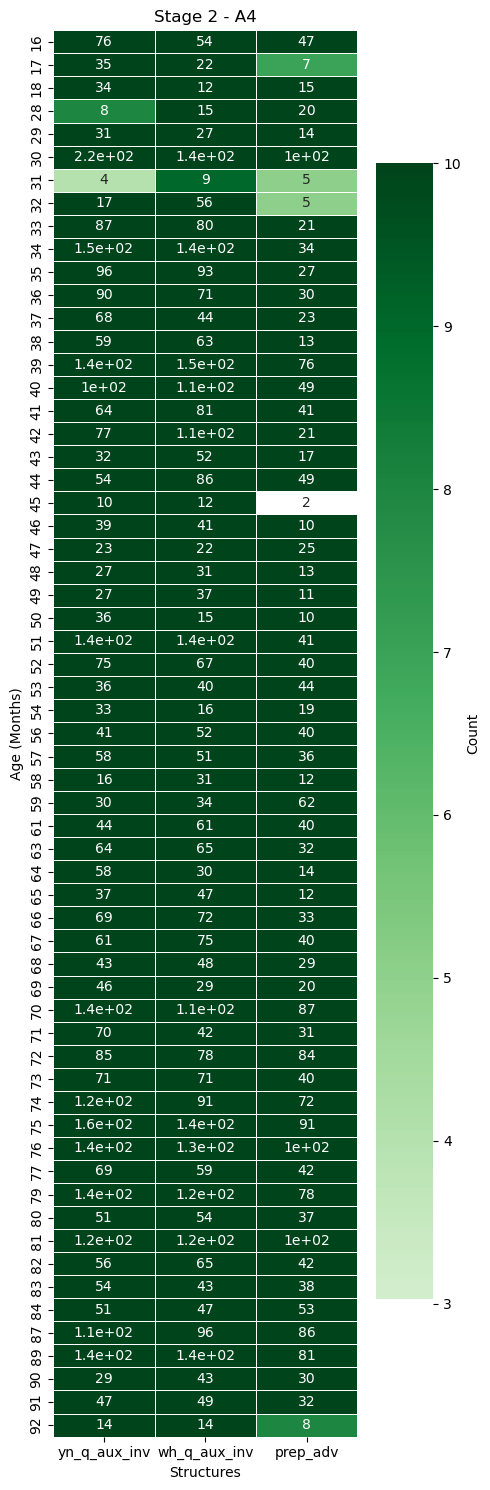

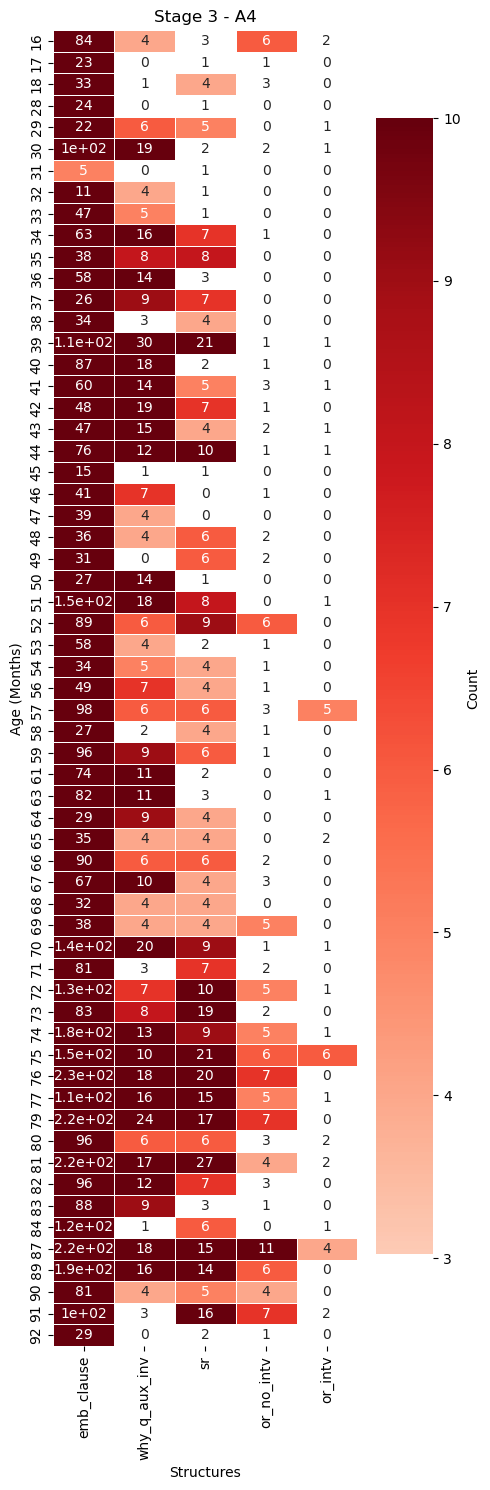

Heatmap: C1


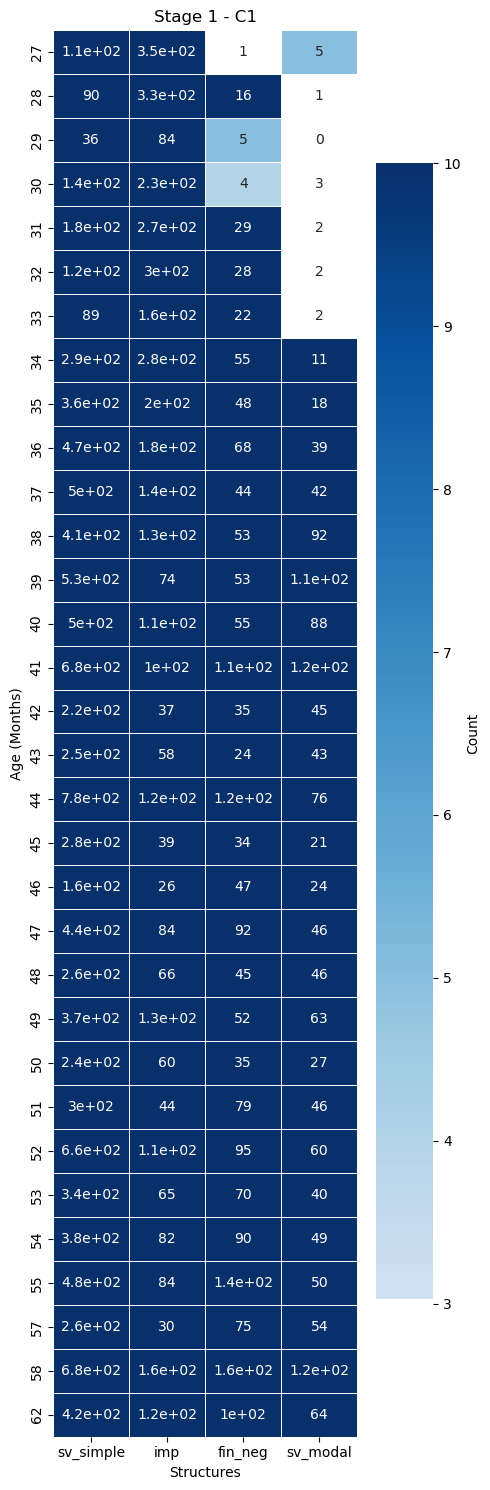

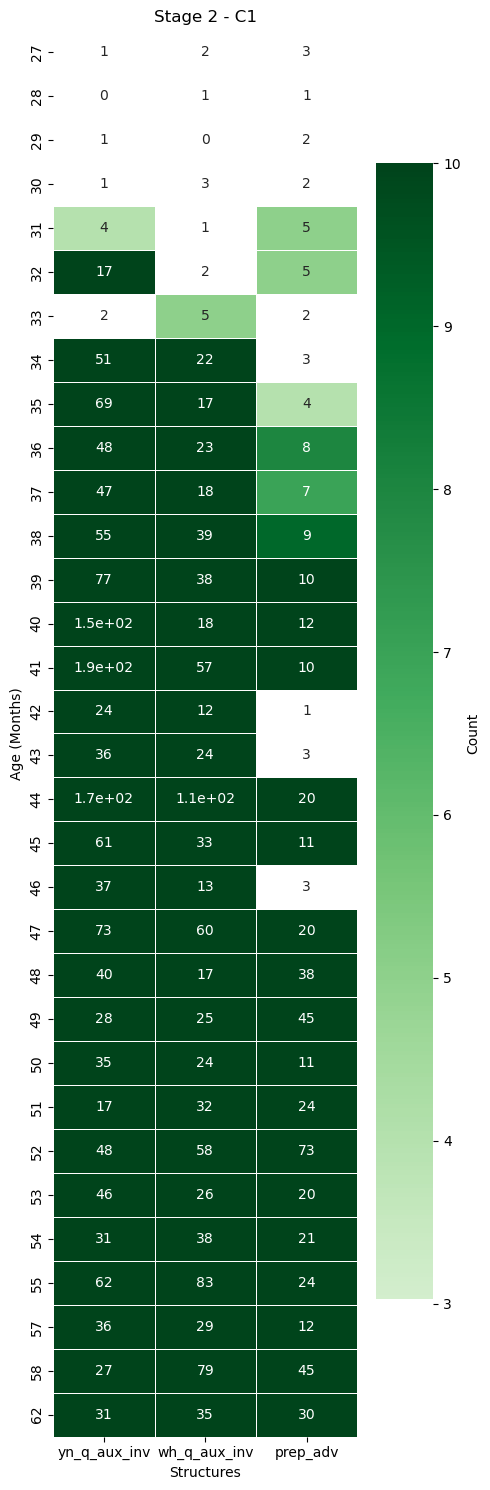

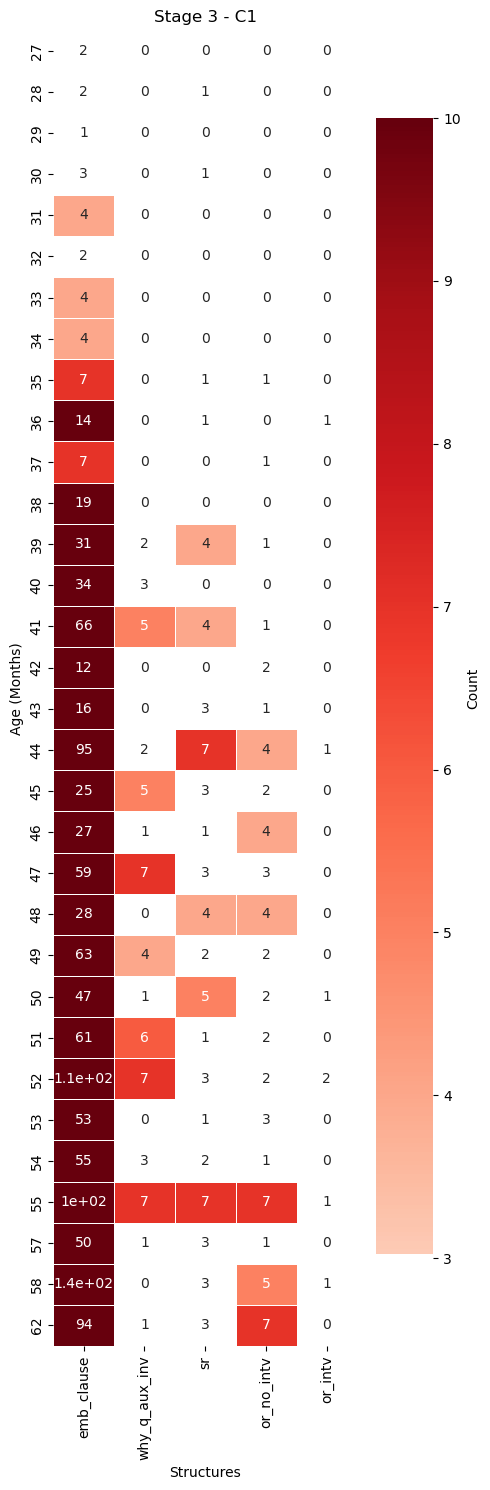

Heatmap: C2


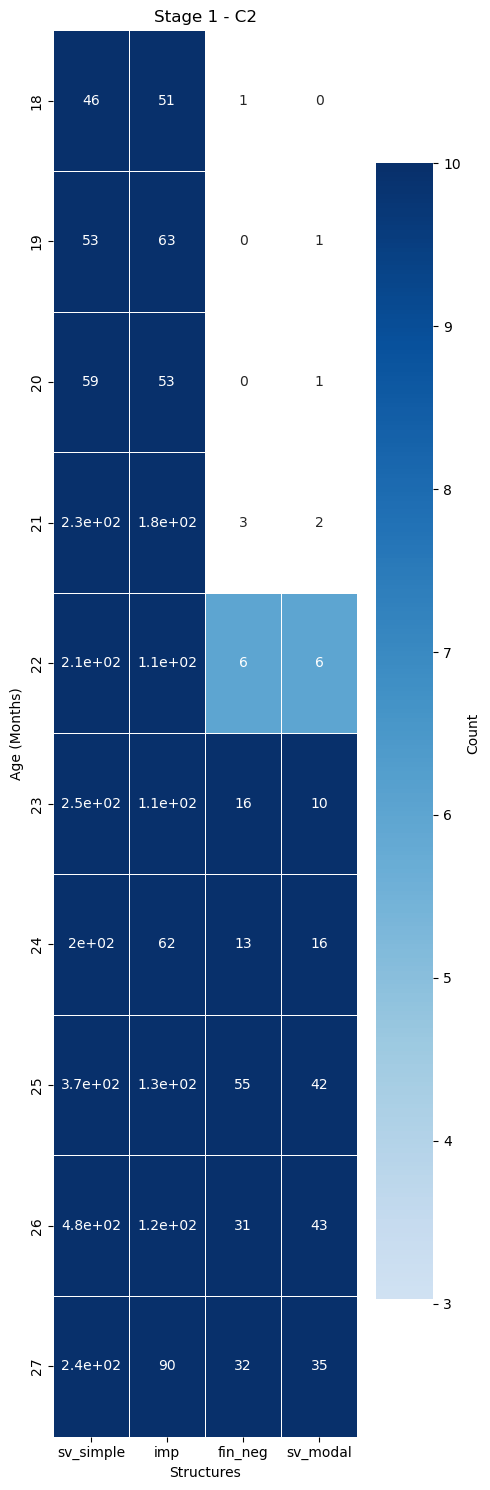

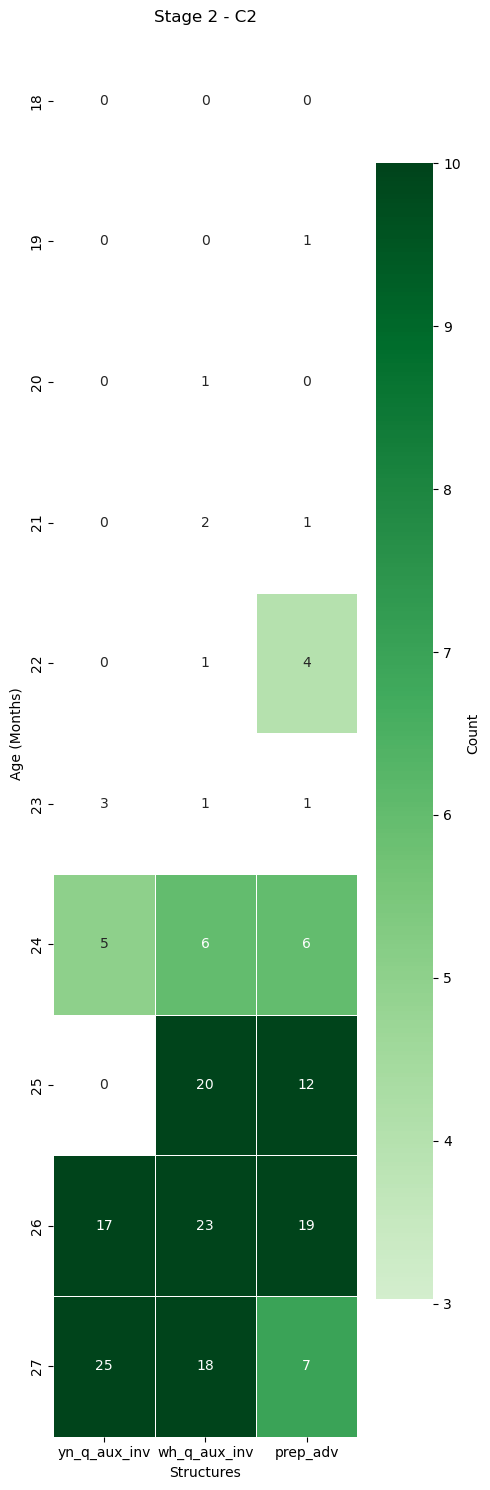

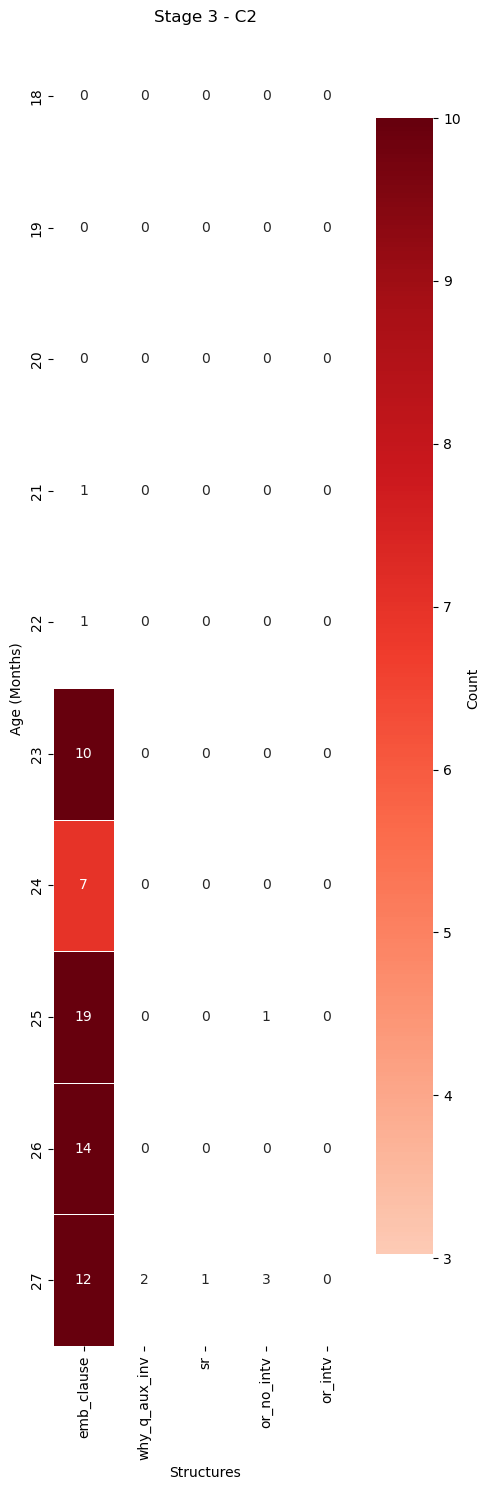

Heatmap: C3


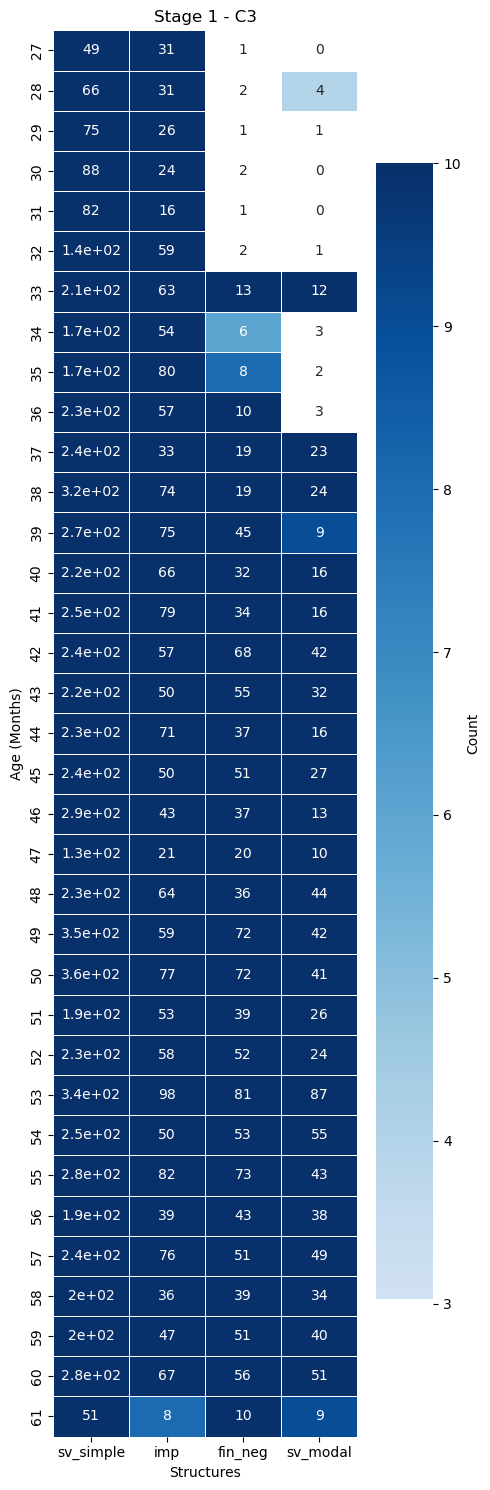

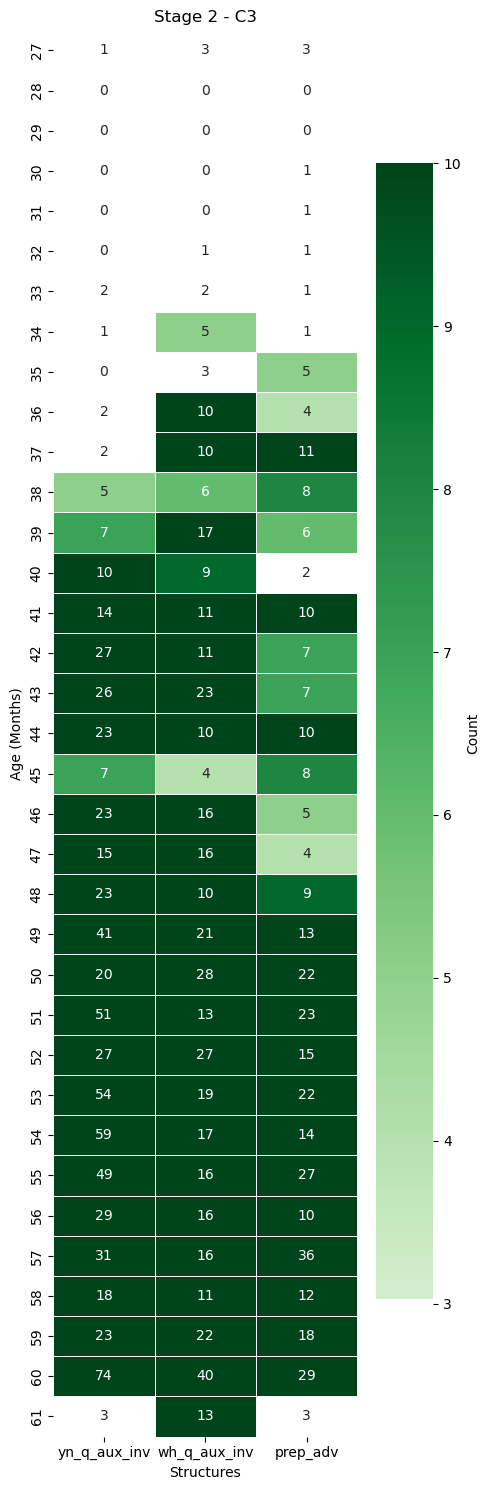

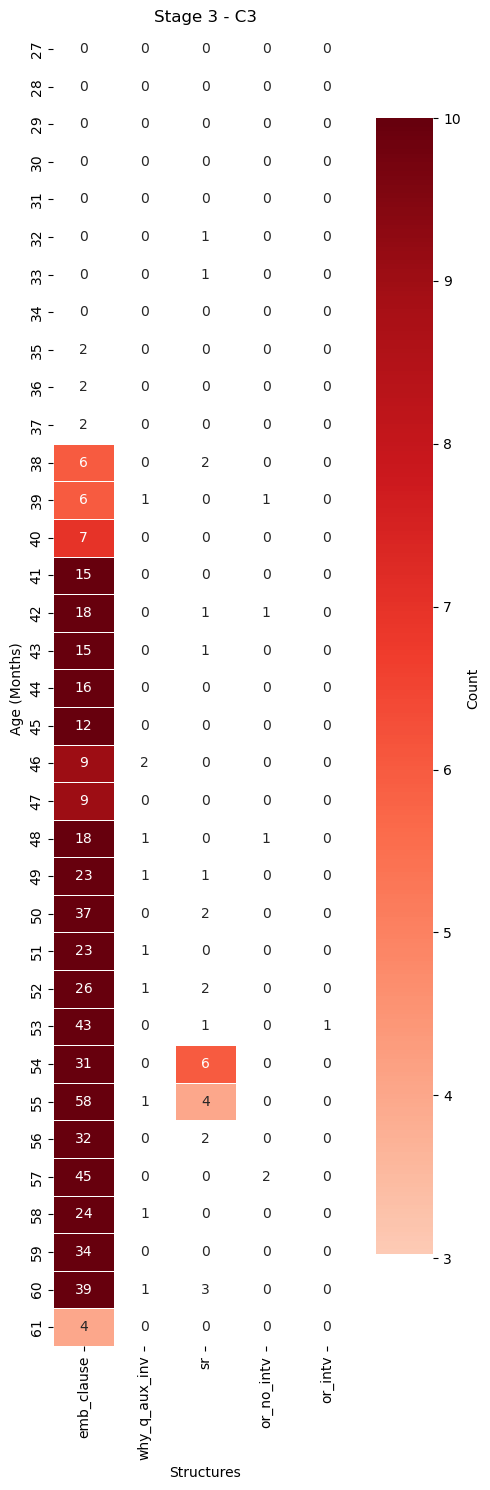

Heatmap: C4


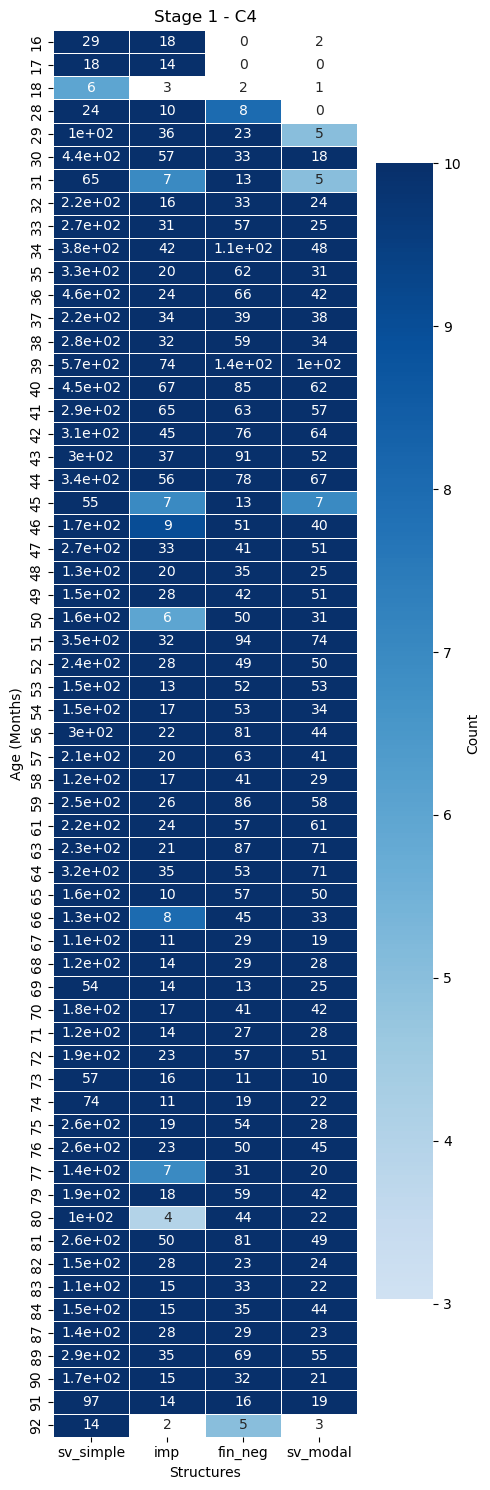

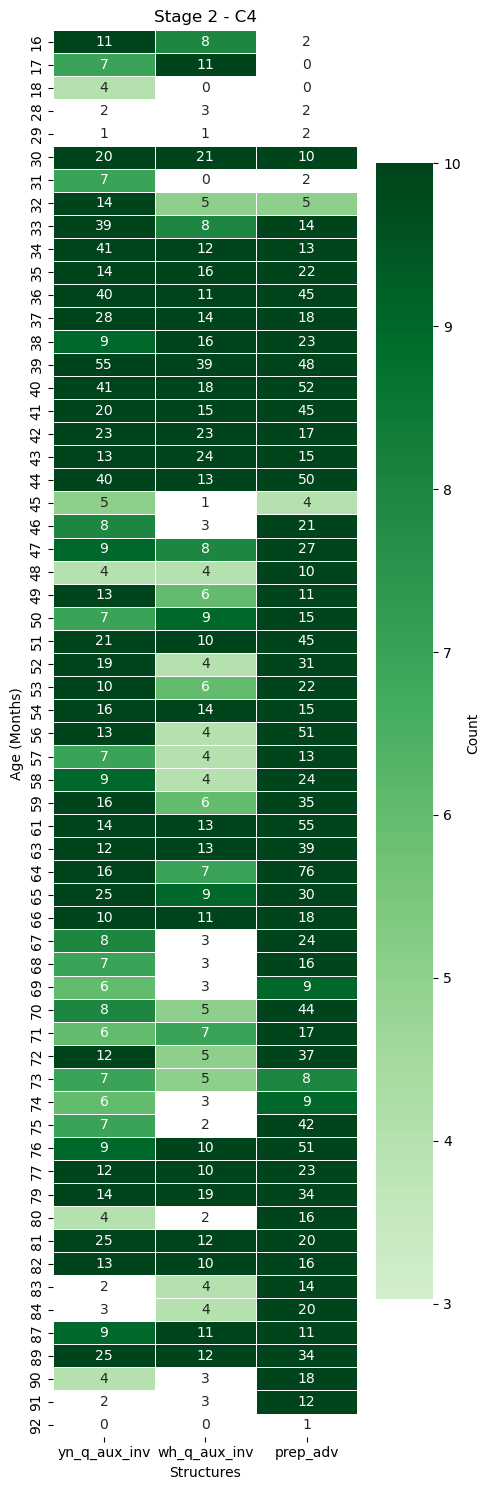

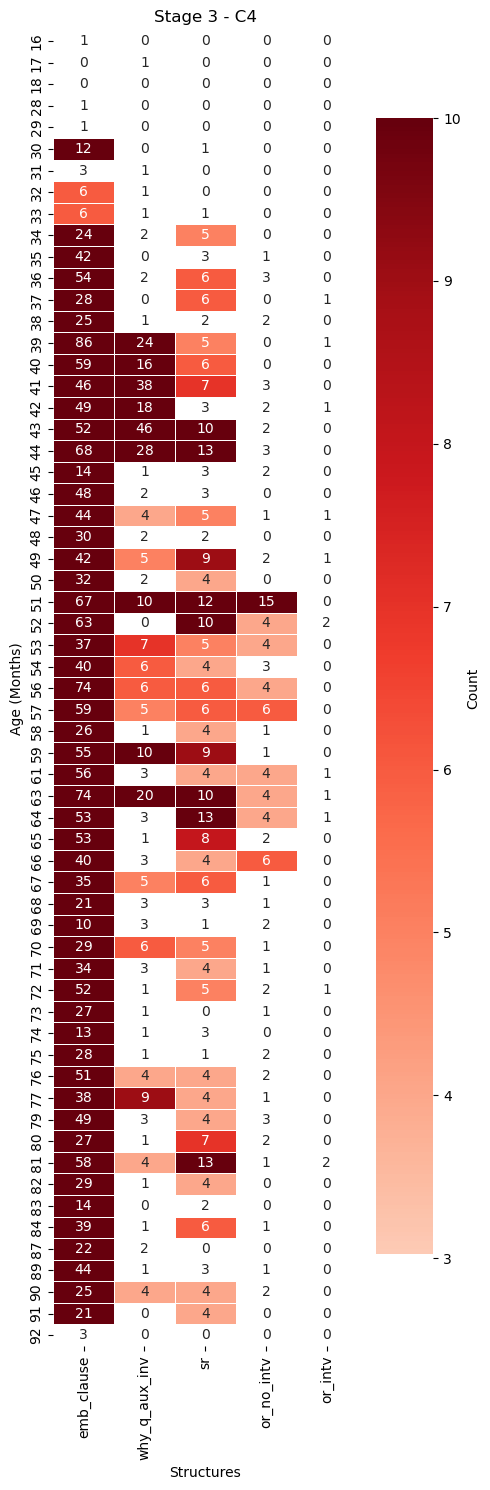

Heatmap: C5


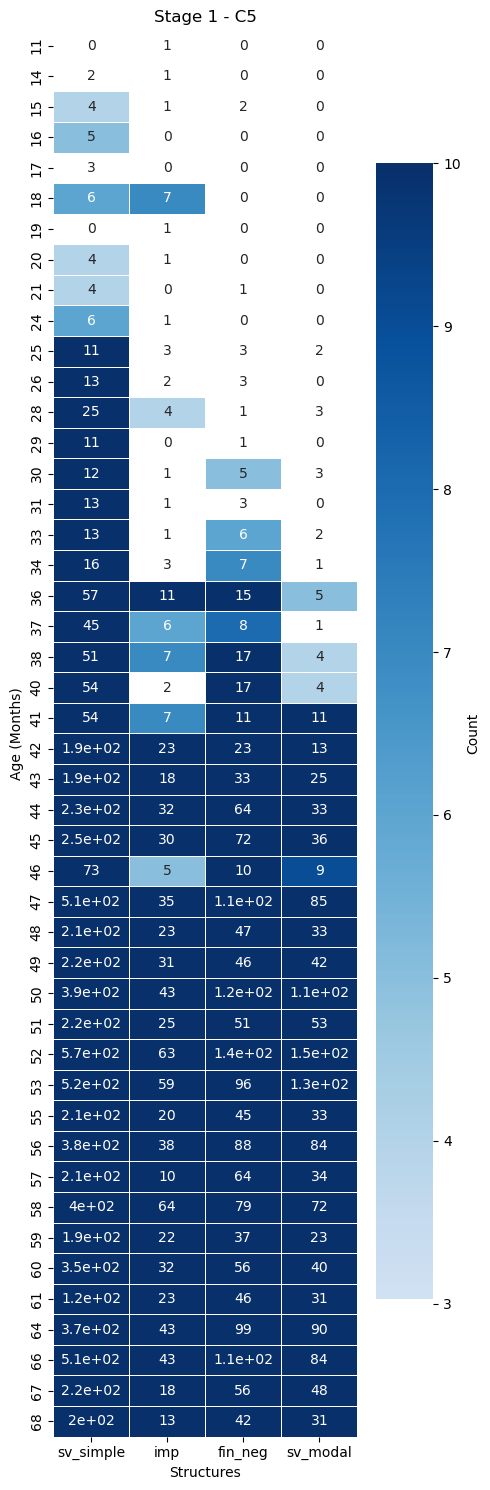

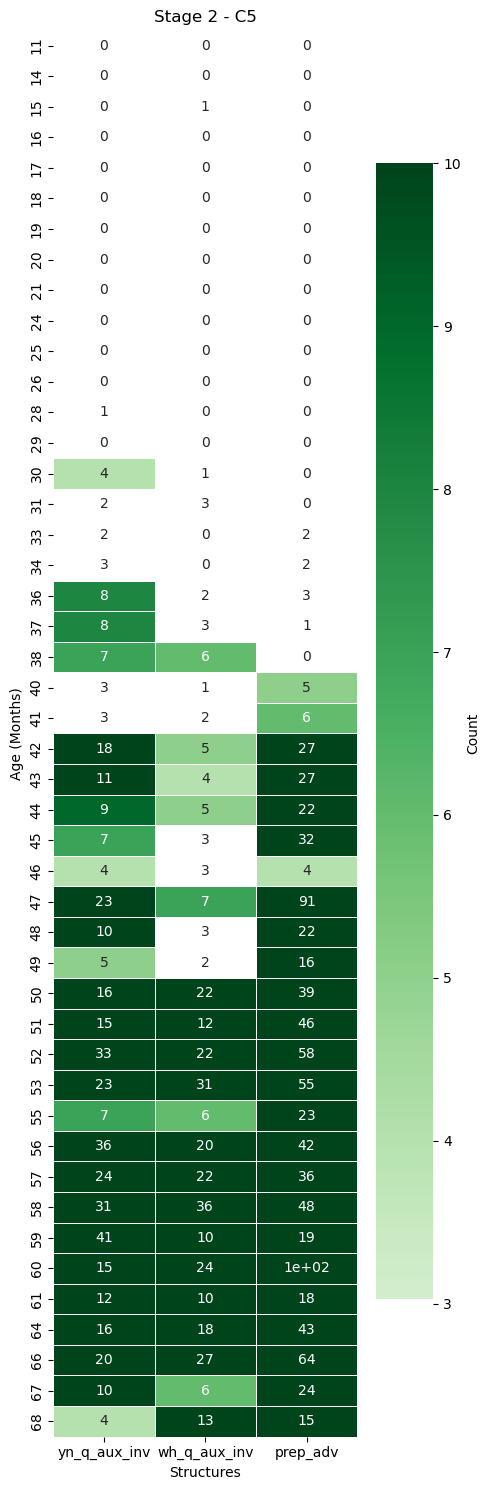

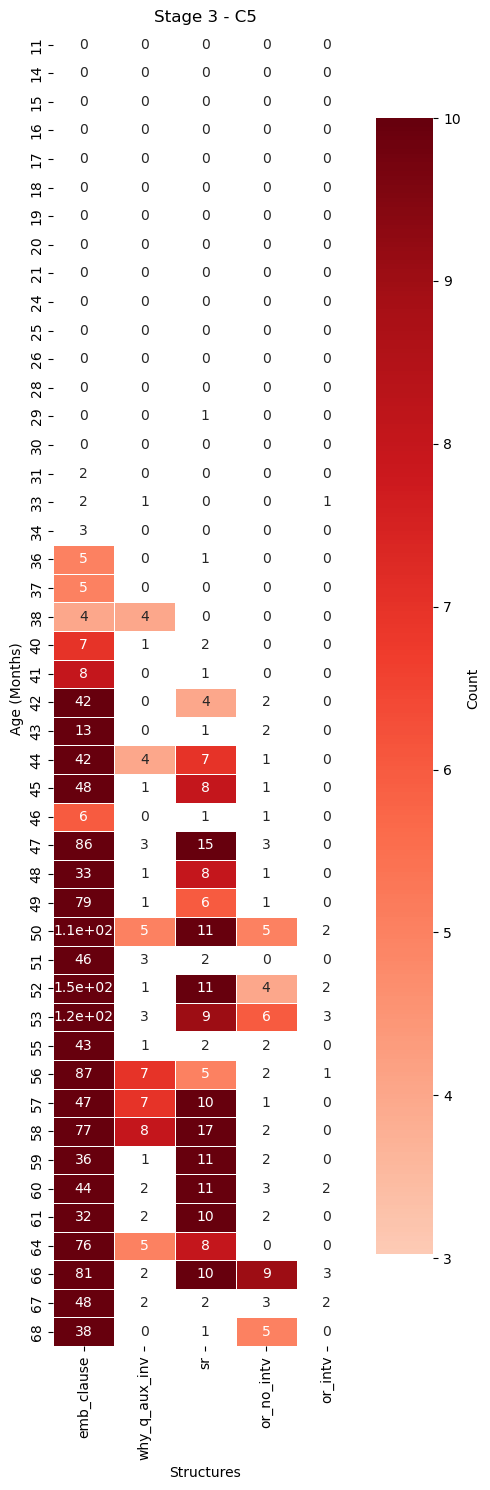

In [67]:
heatmaps(df_sum)